In [2]:
import pandas as pd 

df = pd.read_csv('sampled_data_45.csv', header=None)

m_r_p = df.iloc[1:, :-1]
star_type = df.iloc[1:, -1]




In [3]:
m_r_p

,0,1,2
1,2.3869599793455145,10.9217920267008,804.0
2,2.385946614773768,10.669585890486523,1046.0
3,2.371257756271798,11.13559432614719,639.0
4,2.3807494359605217,11.034604420678232,713.0
5,2.3707669341324955,11.139999999999263,636.0
...,...,...,...
2921,2.061588381638193,10.663999999999527,420.0
2922,2.1961495333578744,9.853879573138803,1148.0
2923,2.025065118146586,10.75099999999948,370.0
2924,2.1440726821255,10.379999999999686,613.0


In [4]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(m_r_p, star_type, test_size=0.2, random_state=42)





In [5]:
classifier = RandomForestClassifier(n_estimators=500, criterion="entropy", max_depth=12, max_features="log2",  random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)



accuracy score:91.79%


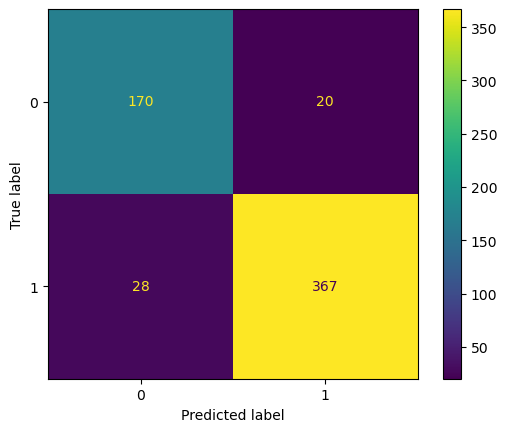

In [6]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot() 


print(f"accuracy score:{accuracy_score(y_test, y_pred) * 100:.2f}%")


In [7]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       190
           1       0.95      0.93      0.94       395

    accuracy                           0.92       585
   macro avg       0.90      0.91      0.91       585
weighted avg       0.92      0.92      0.92       585



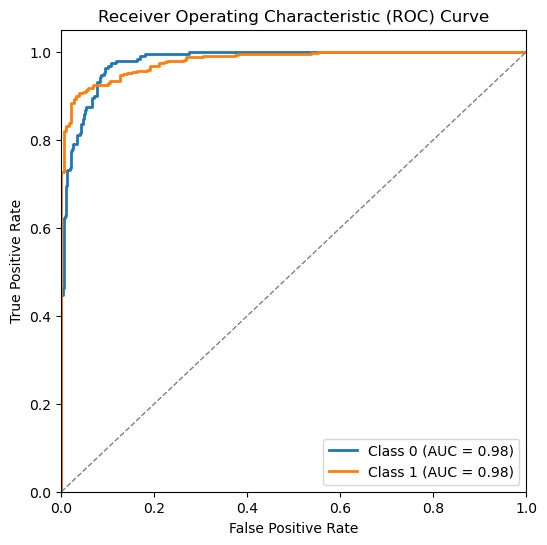

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  roc_curve, auc
import matplotlib.pyplot as plt


# Train RandomForest model

# Predict probabilities for ROC curve
y_test_proba = classifier.predict_proba(X_test)
# Compute ROC curve and AUC score for each class
plt.figure(figsize=(6, 6))
for i, class_label in enumerate(classifier.classes_):
    fpr, tpr, _ = roc_curve(y_test, y_test_proba[:, i], pos_label=class_label)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {class_label} (AUC = {roc_auc:.2f})')

# Plot ROC Curve
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', lw=1) 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()